#	Data Transformations & Standardization
In this code notebook, we will explore various **data transformations and standardization techniques** commonly used in hyperspectral image analysis. Specifically, we will cover:
1.  standard normalization
2.  min-max normalization.
3. Robast normalization.
4. reflectance exponentiation.

These techniques are essential for preprocessing and preparing hyperspectral data for machine learning models. We will provide sample code and data to demonstrate the implementation of these techniques in Python. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [2]:
# Load data
def load_data(csv_path, feature_col_start, feature_col_end, target_col):
    """
    Load a CSV file into a Pandas DataFrame and separate the feature and target columns.

    Parameters:
        csv_path (str): Path to the CSV file to load.
        feature_col_start, feature_col_end, (ints): Range of column indices to use as features.
        target_col (str or int): Name or index of the column to use as target.

    Returns:
        new_df: A df containing the features + labels DataFrame.
    """
    # Load CSV into a Pandas DataFrame
    df = pd.read_csv(csv_path)

    # Extract the feature and target columns
    new_df = df[df.columns[feature_col_start: feature_col_end]]
    new_df[target_col] = df[target_col]

    return new_df

In [3]:
# Standard normalization
def standardize_data(df,target_col):
    """
    Standardize features by removing the mean and scaling to unit variance.

    Parameters:
        df (pd.DataFrame): DataFrame containing the features and target.
        target_col (str): Name or index of the column to use as target.

    Returns:
        df_standardized (pd.DataFrame): DataFrame with the standardized data.
    """
    # Compute the standard deviation of the training set
    X = df.drop(target_col, axis=1)

    # Standard each feature
    scaler=StandardScaler()
    df_standardized = pd.DataFrame(scaler.fit_transform(X.T))
    
    # Transpose the data back
    df_standardized  = df_standardized.T

    # set columns
    df_standardized.columns = X.columns

    return df_standardized

In [4]:
# Min-max normalization
def normalize_data(df,target_col):
    """
    Normalize the data by scaling each feature to the range [0, 1].

    Parameters:
        df (pd.DataFrame): DataFrame containing the features and target.
        target_col (str): Name or index of the column to use as target.
    Returns:
        df_normalized (pd.DataFrame): DataFrame with the normalized data.
    """
    X = df.drop(target_col, axis=1)

    # Scale each feature to the range [0, 1]
    scaler=MinMaxScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(X.T))
    
    # Transpose the data back
    df_normalized  = df_normalized.T

    # set columns
    df_normalized.columns = X.columns

    return df_normalized

In [11]:
# Robust normalization
def robust_data(df,target_col):
    """
    Scale features using statistics that are robust to outliers.
    Removes the median and scales the data according to the quantile range.

    Parameters:
        df (pd.DataFrame): DataFrame containing the features and target.
        target_col (str): Name or index of the column to use as target.
    Returns:
        df_robust (pd.DataFrame): DataFrame with the robusted data.
    """
    X = df.drop(target_col, axis=1)

    # Scale each feature 
    scaler=RobustScaler()
    df_robust = pd.DataFrame(scaler.fit_transform(X.T))
    
    # Transpose the data back
    df_robust  = df_robust.T

    # set columns
    df_robust.columns = X.columns

    return df_robust

In [8]:
def exp_data(df):
    """
    Perform exponential transformation on the data.

    Parameters:
        df (Pandas DataFrame): Dataframe containing the features and target variable.

    Returns:
        Pandas DataFrame: Dataframe with the transformed features and target variable.
    """
    
    df_exp = df.copy()
    
    # Get columns with float values
    float_cols = df_exp.select_dtypes(include=[np.float])

    # Exponentiate the float columns
    exp_cols = np.exp(float_cols)

    # Replace the original float columns with the exponentiated ones
    df_exp[float_cols.columns] = exp_cols

    return df_exp

## Example

In [12]:
import matplotlib.pyplot as plt

# Define input parameters
csv_path = '/content/data.csv'
feature_idx_i,feature_idx_f = 16,-2
target_col = 'A'

# Load data
data = load_data(csv_path, feature_idx_i,feature_idx_f, target_col)

# Standardize data
standardized_data = standardize_data(data, target_col)

# Normalize data
normalized_data = normalize_data(data, target_col)

# Robusred data
robust_data = robust_data(data, target_col)

# Exponential transformation
exp_transformed_data = exp_data(data)

<ipython-input-2-1cfd01f0ba79>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[target_col] = df[target_col]
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN s

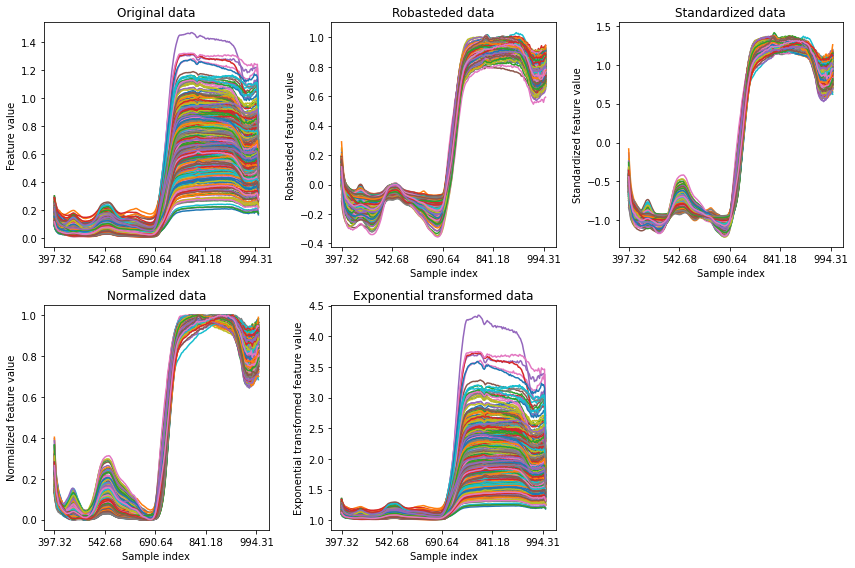

In [13]:
# Create a figure with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot the original data
axs[0, 0].plot(data.iloc[:, :-1].T)
axs[0, 0].set_xlabel('Sample index')
axs[0, 0].set_ylabel('Feature value')
axs[0, 0].set_title('Original data')
axs[0,0].set_xticks(np.arange(0, len(data.columns)-1, 50))

# Plot the Robust data
axs[0, 1].plot(robust_data.iloc[:, :-1].T)
axs[0, 1].set_xlabel('Sample index')
axs[0, 1].set_ylabel('Robasteded feature value')
axs[0, 1].set_title('Robasteded data')
axs[0,1].set_xticks(np.arange(0, len(robust_data.columns)-1, 50))

# Plot the standardized data
axs[0, 2].plot(standardized_data.iloc[:, :-1].T)
axs[0, 2].set_xlabel('Sample index')
axs[0, 2].set_ylabel('Standardized feature value')
axs[0, 2].set_title('Standardized data')
axs[0, 2].set_xticks(np.arange(0, len(standardized_data.columns)-1, 50))

# Plot the normalized data
axs[1, 0].plot(normalized_data.iloc[:, :-1].T)
axs[1, 0].set_xlabel('Sample index')
axs[1, 0].set_ylabel('Normalized feature value')
axs[1, 0].set_title('Normalized data')
axs[1, 0].set_xticks(np.arange(0, len(normalized_data.columns)-1, 50))

# Plot the exponential transformed data
axs[1, 1].plot(exp_transformed_data.iloc[:, :-1].T)
axs[1, 1].set_xlabel('Sample index')
axs[1, 1].set_ylabel('Exponential transformed feature value')
axs[1, 1].set_title('Exponential transformed data')
axs[1, 1].set_xticks(np.arange(0, len(exp_transformed_data.columns)-1, 50))

# Remove the last subplot
fig.delaxes(axs[1, 2])

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()
